# MNIST 이미지 인식

## 데이터 로드

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# !pip install tensorflow
# !pip install keras

In [3]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras import layers
from keras import models

## MNIST 이미지 확인

11501568/11490434 [==============================] - 0s 0us/step


<function matplotlib.pyplot.show>

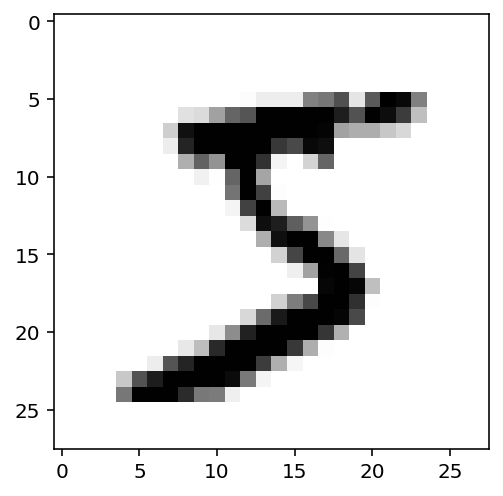

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels[:3]

array([5, 0, 4], dtype=uint8)

## MLP 입력 전처리
- MLP는 1차원 텐서 즉 벡터를 입력으로 사용한다
- 목적 변수는 원 핫 인코딩을 한다. to_categorical를 사용한다

In [7]:
train_images_flat = train_images.reshape(60000, 28*28)
train_images_flat = train_images_flat.astype('float32')/255

test_images_flat = test_images.reshape(10000, 28*28)
test_images_flat = test_images_flat.astype('float32')/255

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [8]:
train_labels_cat[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# MLP 모델

In [9]:
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape = (28*28,)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [11]:
model.fit(train_images_flat, train_labels_cat, epochs=3, batch_size=64)

Epoch 1/3
938/938 [==============================] - 7s 4ms/step - loss: 0.2680 - accuracy: 0.9221
Epoch 2/3
938/938 [==============================] - 4s 4ms/step - loss: 0.1170 - accuracy: 0.9649
Epoch 3/3
938/938 [==============================] - 4s 4ms/step - loss: 0.0831 - accuracy: 0.9750


In [12]:
test_loss, test_acc = model.evaluate(test_images_flat, test_labels_cat)
print('loss, acc = ',test_loss, test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0915 - accuracy: 0.9708
loss, acc =  0.09146393090486526 0.97079998254776


###  예측에 사용하기
- agrmax()로 판별

In [13]:
model.predict(train_images_flat[0:3])

array([[1.4567356e-09, 7.4509366e-08, 1.5134860e-07, 1.0668320e-02,
        6.4558337e-14, 9.8933136e-01, 1.0078044e-10, 1.3668271e-10,
        2.2042997e-08, 1.3426542e-07],
       [9.9997032e-01, 3.0064989e-10, 2.1213335e-05, 2.1893251e-07,
        1.1106848e-09, 1.4926590e-08, 2.0457795e-08, 7.4064233e-06,
        3.1377476e-07, 4.9711832e-07],
       [4.8249120e-08, 8.4093163e-06, 3.4094538e-04, 7.1011623e-06,
        9.9693310e-01, 1.7378233e-06, 1.4566567e-05, 2.6458909e-03,
        6.7463093e-06, 4.1359472e-05]], dtype=float32)

In [14]:
np.argmax(model.predict(train_images_flat[0:3]), axis=1)

array([5, 0, 4])

# CNN 모델
- 입력으로 4차원 구조를 필요로 한다
- (샘플수, 행, 열, 특성수)

In [15]:
train_images_cnn = train_images.reshape(-1,28,28,1)
test_images_cnn = test_images.reshape(-1,28,28,1)

In [16]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()   

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [17]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [18]:
model.fit(train_images_cnn, train_labels_cat, epochs=3, batch_size=64)

Epoch 1/3
938/938 [==============================] - 36s 9ms/step - loss: 0.3890 - accuracy: 0.9394
Epoch 2/3
938/938 [==============================] - 8s 8ms/step - loss: 0.0589 - accuracy: 0.9837
Epoch 3/3
938/938 [==============================] - 8s 8ms/step - loss: 0.0434 - accuracy: 0.9882


In [19]:
test_loss, test_acc = model.evaluate(test_images_cnn, test_labels_cat)
print('test_acc = ',test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0508 - accuracy: 0.9855
test_acc =  0.9854999780654907


In [20]:
model.predict(train_images_cnn[:3])

array([[1.1473170e-17, 1.9582922e-14, 7.4825291e-14, 5.0693183e-05,
        1.8854987e-15, 9.9994934e-01, 1.8751610e-13, 4.1450152e-11,
        4.4978509e-12, 5.4155606e-08],
       [9.9999917e-01, 2.0249339e-11, 4.3717932e-07, 2.9148763e-11,
        1.7749244e-12, 4.1779207e-09, 2.7392238e-07, 1.8500314e-12,
        7.6201667e-09, 8.8898382e-08],
       [3.3045217e-16, 7.2751444e-11, 5.4930249e-10, 2.9582839e-14,
        9.9997973e-01, 1.0426914e-09, 4.2961084e-14, 7.7769533e-09,
        4.6519979e-08, 2.0273392e-05]], dtype=float32)

In [21]:
np.argmax(model.predict(train_images_cnn[:3]), axis=1)

array([5, 0, 4])

# (참고) MLP를 이용한  회귀 예측

In [22]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print(x_train.shape)

x_train[:3]

65536/57026 [==================================] - 0s 0us/step
(404, 13)


array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00]])

In [23]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (13,)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                448       
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 1,185
Trainable params: 1,089
Non-trainable params: 96
___________________________________________________

In [24]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')
history = model.fit(x_train, y_train, epochs=32, batch_size=8, verbose=1)

Epoch 1/32
51/51 [==============================] - 1s 5ms/step - loss: 579.6453
Epoch 2/32
51/51 [==============================] - 0s 5ms/step - loss: 562.8892
Epoch 3/32
51/51 [==============================] - 0s 5ms/step - loss: 542.6131
Epoch 4/32
51/51 [==============================] - 0s 5ms/step - loss: 524.0461
Epoch 5/32
51/51 [==============================] - 0s 5ms/step - loss: 497.7185
Epoch 6/32
51/51 [==============================] - 0s 5ms/step - loss: 468.3247
Epoch 7/32
51/51 [==============================] - 0s 5ms/step - loss: 447.5298
Epoch 8/32
51/51 [==============================] - 0s 5ms/step - loss: 403.3696
Epoch 9/32
51/51 [==============================] - 0s 5ms/step - loss: 359.9807
Epoch 10/32
51/51 [==============================] - 0s 5ms/step - loss: 319.2202
Epoch 11/32
51/51 [==============================] - 0s 5ms/step - loss: 281.0418
Epoch 12/32
51/51 [==============================] - 0s 5ms/step - loss: 245.4546
Epoch 13/32
51/51 [======

In [25]:
model.predict(x_test[:10])

array([[ 5.1292176],
       [19.521084 ],
       [21.691605 ],
       [34.62658  ],
       [23.146355 ],
       [20.166267 ],
       [27.396204 ],
       [23.75312  ],
       [19.5324   ],
       [16.138533 ]], dtype=float32)

In [26]:
y_test[:10]

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2])

In [27]:
import pandas as pd
y_pred = model.predict(x_test).ravel()
df = pd.DataFrame({'y_pred': y_pred, 'y_test':y_test})
df[:5]

,y_pred,y_test
0,5.129218,7.2
1,19.521084,18.8
2,21.691605,19.0
3,34.626579,27.0
4,23.146355,22.2


In [28]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.9192596634524588

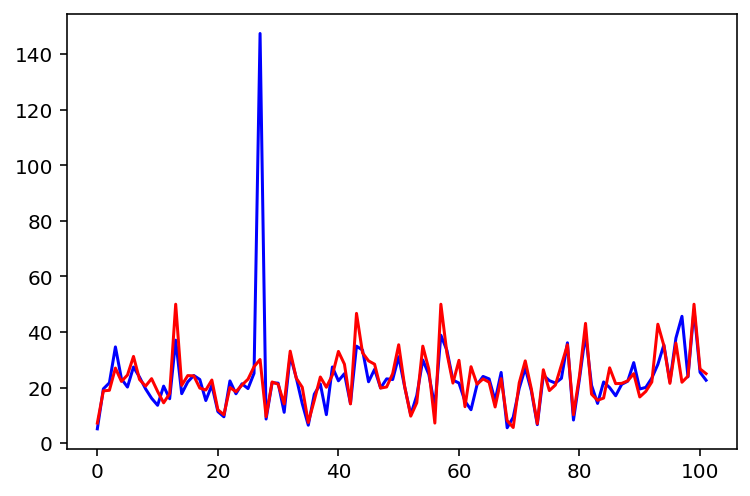

In [29]:
import matplotlib.pyplot as plt
plt.plot(y_pred, c='b')
plt.plot(y_test, c='r')

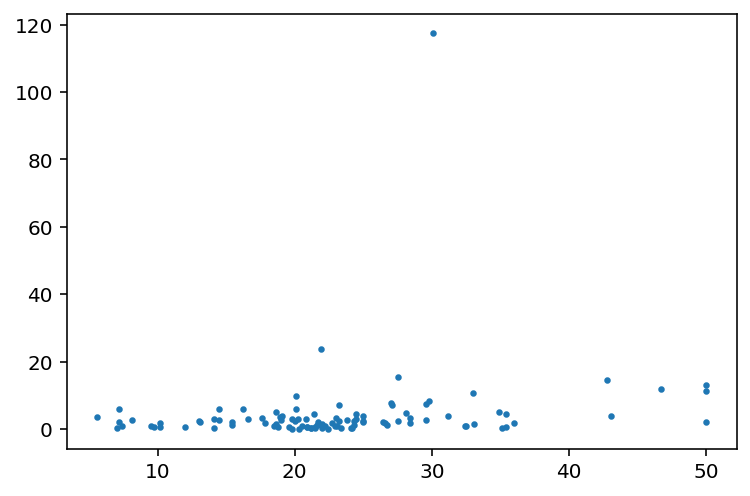

In [30]:
plt.scatter(y_test, np.abs(y_test-y_pred), s=5)

In [31]:
history.history.keys()

dict_keys(['loss'])

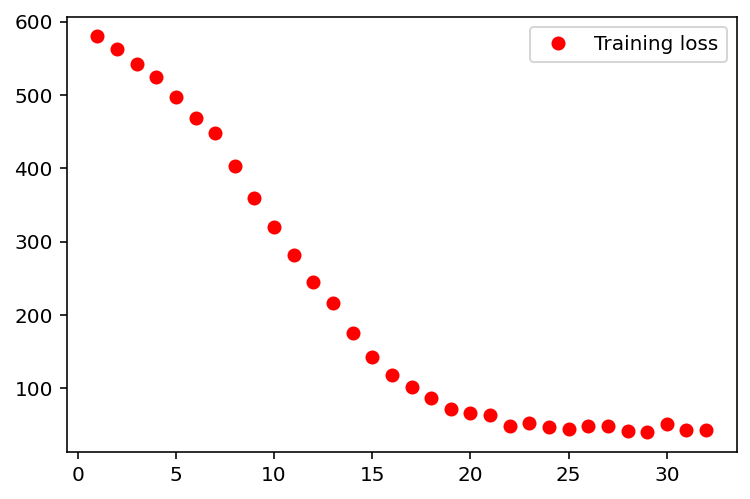

In [32]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()